# <center>Kickstarter Project<center>
#### Group 4
* Alice Chaves, 48857
* Filipa Esteves, 48842
* Ieva Paleckyte, 48327
* Isabel Mora Labarca, 48516
* Maria-Eleni Ioannou, 48421

#### Data used for this project was based on Kickstarters' crowfunding website project proposals

# **<center><span style="color:limegreen">Business understanding</span><center>**

* **Why predicting if a project will be succesful is useful?**

> We deeply believe that nowadays, in the world of business, the information flow and the risks that exist, as well as the requirement to make decision fast are high. Being able to predict the projects that will drive success, can be a great competitive advantage of any business, especialy the ones dealing with innovative ideas or projects that require high investment spendings and are characterized by more uncertainty. This way, portofolio management processes are not anymore prone to human error, the prioritization of projects and the product development can be accurately planned,  not only based on time-consuming or more generic management tools (NPI, strategic buckets etc). Therefore, there is a higher chance of developing succesful projects and letting go faster of the ones that are not to be developed ,since these are also higly important elements to acquire space/time and save resources for existing products/new ideation. 
<br>

* **Is it possible to predict the success/failure of a project without using ML to help us?** <br>**Let's find out...**
    
> There are a lot of different sources of information that can provide us important details in order to understand the probabilities of a project being successful or not. For example, we could search on media, see what people are talking about regarding the project, see what needs it meets, at which stage it is and the effort that is being allocated. Also, we could rely on studies already done in this field which could also give us an advantage in terms of business opportunities. After getting informed about what type of ideas are getting a bigger hype and complementing it with other studies regarding the topic, we are more prepared to go deep into the dataset. 
<br>

>  For the human eye the dataset is too big fo someone to be able to make any conclusions and, furthermore, it will be difficult to work with it. For example, in excel due to a large amount of information captured. If we managed to do so, which is already difficult and we would probably require to delete some part of the data in order to be able to analyze it without asking too much computational effort from our machines, we can create metrics that we found useful to determine success and check the correlations between the features.
<br>

> The process of determining which features will be more useful to predict the success is only done throughout our capability of analysis and with a high dependence on our statistical approaches which in the end might not be sufficient (prone to human error). 
<br>

> Let's imagine we spend a month analysing the data, trying to see what features to keep and what features to drop and we finally manage to end up with a solution, a basic one, and without using all the data, and we consider it enough to proceed. In the next month, we will have a whole new file with different projects that are being taken into consideration, we will need to do everything again because we are not able to automate the process and all the analysis needs to be done again.  
<br>

> Therefore analysing this project without relying on the possibilities that applying a machine algorithm gives us will be an extremely time-consuming task, prone to errors, with a high probability of not being able to manage all the data and therefore end up with a very weak solution to our problem.
<br>

> By applying the correct machine learning algorithm, we can easily see what features are being considered important, we can easily see the error in our model with data not seen before and therefore improve the model. Additionally, we can without any difficulties add new data as we go and as the business world changes, adapting our model to it.

* **ML model implementation**

> Before proceeding with a ML model, it is necessary to evaluate how such model could improve and/or automate the decision making. Therefore, we need to answer the later statement and assess whether the tasks can be automated. The process of determining whether a Kickstarter project will succeed requires a lot of repetitive tasks to go through each projects specifics such as required funding, acquired funds, topics, and then compare with projects that succeeded in the past. This process is very lengthy and prone to human error, therefore, it would definitely benefit from automation. The possession of hundreds of historical labeled data points could help automatically classify whether the project will succeed. In addition to that, the model, if fed with updated data, could constantly improve, and learn. 
   
> Still, we need to ensure the quality and quantity of our data – it seems we have enough of labeled data points that seem to touch upon majority of possible Kickstarter project topics, which would be helpful to obtain our desired output. On top of that, there are various data that could act as proxy for our target variable and even though this data would be excluded from the model, it could still serve to better understand what determines whether the project is successful or not.  

> Moving on, we still need to determine whether data exhibits pattern – for instance, whether projects with a specific number of backers are projects under a certain subject always succeed. If the data is patterned, it would vastly benefit in extracting meaningful outcome.  

> The following point is to determine the appropriate metrics for our model. One of the mentioned metrics are the precision score - it is more important for us to determine which projects are classified correctly as successful out of all projects classified as successful, since a low precision score could mean a lot of funding distributed towards unsuccessful projects, meaning, unsuccessful investments. 

> After we have touched upon the points mentioned above, we would need to preproccess the data - different processing for numerical and categorical variables. Next step is to train the model and check the metrics that are relevant to classification (accuracy, precision and recall). 

> One of the last points would be to continuously update the model with new data. Clearly, the Kickstarter project dataset is in the industry where topics of interest, subjects and trends are constantly changing and a successful project in a film industry could not be successful after a year due to changes in trends and interests in the market. Additionally, due to economic environment changes, equivalent projects with smaller fundings could be successful while the inflation might cause in the respective funding being too small for the project to succeed after various years. Therefore, it is crucial to make sure that the model updates its parameters based on new data. 

In [170]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from statistics import mean
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector
import json
import ast
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [142]:
# Downloading the data
from zipfile import ZipFile

zip_file = ZipFile('Kickstarter_Dataset.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

# **<center><span style="color:limegreen">Data Preparation</span><center>**

In [143]:
# Concatenating the files 
df_all = pd.concat(dfs.values(), ignore_index=True)

In [144]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205696 entries, 0 to 205695
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             205696 non-null  int64  
 1   blurb                     205686 non-null  object 
 2   category                  205696 non-null  object 
 3   converted_pledged_amount  205696 non-null  int64  
 4   country                   205696 non-null  object 
 5   created_at                205696 non-null  int64  
 6   creator                   205696 non-null  object 
 7   currency                  205696 non-null  object 
 8   currency_symbol           205696 non-null  object 
 9   currency_trailing_code    205696 non-null  bool   
 10  current_currency          205696 non-null  object 
 11  deadline                  205696 non-null  int64  
 12  disable_communication     205696 non-null  bool   
 13  friends                   276 non-null     o

In [145]:
df_all.isnull().sum()

backers_count                    0
blurb                           10
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     205420
fx_rate                          0
goal                             0
id                               0
is_backing                  205420
is_starrable                     0
is_starred                  205420
launched_at                      0
location                      1292
name                             1
permissions                 205420
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

In [146]:
df_all.shape

(205696, 37)

In [147]:
# Dropping non-relevant columns and null ones
df = df_all.drop(['currency_symbol', 'currency_trailing_code', 
                'disable_communication', 'friends', 'is_backing', 'is_starrable', 'is_starred', 'permissions',
 'photo', 'profile',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick', 'state_changed_at', 'urls'], axis = 1)

In [148]:
# Now we only have less than 2000 nulls per column
df.isnull().sum()

backers_count                  0
blurb                         10
category                       0
converted_pledged_amount       0
country                        0
created_at                     0
creator                        0
currency                       0
current_currency               0
deadline                       0
fx_rate                        0
goal                           0
id                             0
launched_at                    0
location                    1292
name                           1
pledged                        0
state                          0
static_usd_rate                0
usd_pledged                    0
usd_type                    1728
dtype: int64

In [149]:
# Check the values in the target variable
df["state"].value_counts()

successful    114158
failed         74951
canceled        8532
live            7438
suspended        617
Name: state, dtype: int64

In [150]:
# We drop live, cancelled and undefined states and keep only failed and successful
# We care about the succesful and not succesful projects
df = df.loc[(df['state'] == 'failed') | (df['state'] == 'successful')]

In [151]:
# Changed the state values for 1 in case of sucessful and 0 in case of failed
df['state'].replace({'successful':1, 'failed':0}, inplace = True)

In [152]:
# Converting to DateTime objects, creating datetime objects with day-month-year
df['created_at_fixed'] = df['created_at'].apply(lambda t: datetime.datetime.fromtimestamp(t / 1e0).strftime('%Y-%m-%d'))
df['deadline_fixed'] = df['deadline'].apply(lambda t: datetime.datetime.fromtimestamp(t / 1e0).strftime('%Y-%m-%d'))
df['launched_at_fixed'] = df['launched_at'].apply(lambda t: datetime.datetime.fromtimestamp(t / 1e0).strftime('%Y-%m-%d'))

In [153]:
# Drop unfixed columns
df = df.drop(['created_at', 'deadline', "launched_at"], axis = 1)

In [154]:
# Change columns to datetime
df['created_at_fixed'] = pd.to_datetime(df['created_at_fixed'])
df['deadline_fixed'] = pd.to_datetime(df['deadline_fixed'])
df['launched_at_fixed'] = pd.to_datetime(df['launched_at_fixed'])

In [155]:
# We are creating two new variables, 
    # one calculating the difference of days between creating and launching a project
    # the other one is the difference between launching a project and its deadline
# This might be a relevant variable, as a hypothesis, for predicting project success
df['delta_created_launch'] = df['launched_at_fixed'] - df['created_at_fixed']
df['delta_launch_deadline'] = df['deadline_fixed'] - df['launched_at_fixed']

In [156]:
# Extracting the days of difference as an integer (keeping only the numbers)
df['delta_launch_deadline'] = pd.to_numeric(df['delta_launch_deadline'].dt.days, downcast='integer')
df['delta_created_launch'] = pd.to_numeric(df['delta_created_launch'].dt.days, downcast='integer')

In [157]:
# Create a new column with the count of how many words the blurb (description of the project) had 
# HYPOTHESIS: might be relevant for predicting project success
df['projectname_len'] = df['blurb'].str.split().str.len()

In [158]:
# Transform the values of category from string to dictionary
df["category"] = df["category"].apply(lambda x : ast.literal_eval(x))

# Divide the name part of the column category into a new column 
df["sub_category"] = df["category"].apply(lambda x : x["name"])

# Divide the slug part of the column category into a new column 
df["main_category"] = df["category"].apply(lambda x: x["slug"])

# Drop the columns of category and blurb since we already split the category into sub_category and main_category
df = df.drop(['category', 'blurb'], axis = 1)

In [159]:
# Dropping null values throughout the dataframe
df.dropna(inplace=True)

In [160]:
# Turning string into columns, extracting only the location of the project
df["location"] = df["location"].apply(lambda x: json.loads(x))
df["city"] = df["location"].apply(lambda x : x["name"])

# Dropping the string
df = df.drop('location', axis = 1)

In [161]:
# Dropping the string creator, couldnt extract it
df = df.drop('creator', axis = 1)

In [162]:
corr_matrix = df.corr()
corr_matrix["state"].sort_values(ascending=False)

state                       1.000000
backers_count               0.106930
usd_pledged                 0.099326
converted_pledged_amount    0.099300
pledged                     0.081036
fx_rate                     0.019554
delta_created_launch        0.013207
projectname_len            -0.000763
id                         -0.002915
static_usd_rate            -0.003659
goal                       -0.035114
delta_launch_deadline      -0.077937
Name: state, dtype: float64

In [163]:
#Dropping the varibales backers_count, converted_pledged_amount, pledged since they contain future information about the project and can be counted as a proxy of the y variable
#It is information that is only obtained after a project meets a deadline and it is decided whether it is succesful/not succesful
df = df.drop(['backers_count', 'converted_pledged_amount', "pledged"], axis = 1)
df = df.drop("current_currency", axis = 1)

In [165]:
df.head()

,country,currency,fx_rate,goal,id,name,state,static_usd_rate,usd_pledged,usd_type,created_at_fixed,deadline_fixed,launched_at_fixed,delta_created_launch,delta_launch_deadline,projectname_len,sub_category,city,Category
0,US,USD,1.000000,3500.0,895922629,Jozii-College Jobs Made Easy,0,1.000000,50.000000,international,2014-10-16,2014-11-28,2014-10-28,12,31,16.0,Web,Manhattan,technology
1,US,USD,1.000000,225.0,1190376005,DROPSY: A different take on the old school adv...,1,1.000000,1613.470000,international,2011-09-28,2011-11-02,2011-10-17,19,16,22.0,Video Games,Homeland,games
2,US,USD,1.000000,6500.0,672906219,Letra Chueca / Crooked Letter: a printshop & b...,1,1.000000,6633.000000,international,2014-06-21,2014-09-12,2014-08-13,53,30,25.0,Letterpress,Portland,publishing
3,GB,GBP,1.317483,15000.0,2121203785,High End Premium Handmade Sneakers,0,1.407899,1.407899,international,2016-03-04,2016-05-03,2016-03-04,0,60,10.0,Footwear,Manchester,fashion
4,CA,CAD,0.771892,15000.0,434454655,The Domenico Sneakerboot by Luigi Sardo Shoes,1,0.782122,19817.405716,international,2015-02-12,2015-04-22,2015-03-18,34,35,21.0,Footwear,Toronto,fashion


In [164]:
df['Category'] = df['main_category'].str.split('/').str[0]

# Dropping the main_category, aiming to keep only the main category out of the whole string, so we don't have subcategory twice
df = df.drop('main_category', axis = 1)

# **<center><span style="color:limegreen">Exploratory Data Analysis</span><center>**

[Text(0.5, 0, 'Amount Pledged in Millions'),
 Text(0, 0.5, 'Goal in Millions'),
 Text(0.5, 1.0, 'Goal vs. Pledged')]

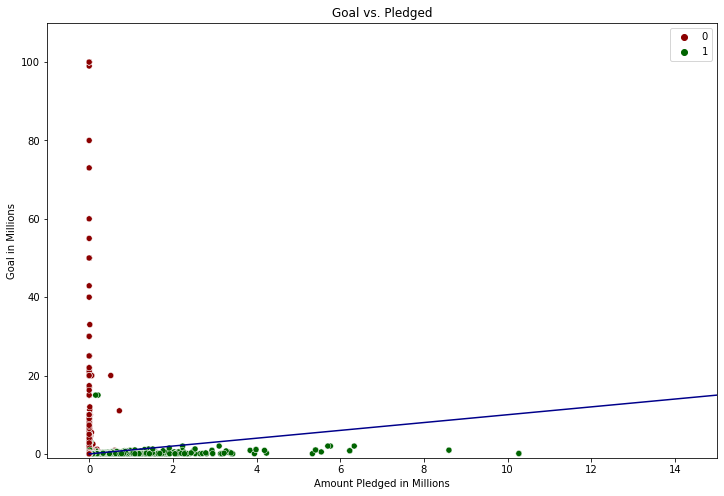

In [172]:
plt.figure(figsize=(12, 8))
colors = ('darkred','darkgreen')

#Zooming in the plot, so we can see more clearly the data points of the scatter plot and better visualize the overlaps 
ax = sns.scatterplot(df.usd_pledged/1e6, df.goal/1e6, hue=df.state, palette=colors)

# Add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,20), y=(0,20), color='darkblue')

#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,110), xlim=(-1,15))

ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

#### Comment on the graph:
* From the plot we can understand that there is a pattern between the variables goal and pledged. Specifically, we can see that the projects that had a higher goal, didnt manage to collect the amount of funds needed to be succesful, whereas, projects with lower requiremnts, tend to gather more funds and be more succesful

[Text(0.5, 0, 'Amount Pledged in Millions'),
 Text(0, 0.5, 'Character Length of Project Name'),
 Text(0.5, 1.0, 'The Importance of Choosing the Right Name')]

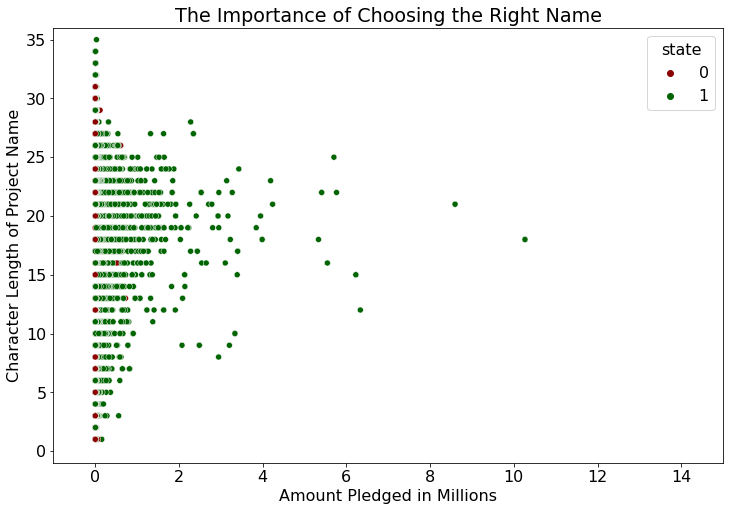

In [173]:
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 16

# Create scatterplot for pledged amount and name length
ax = sns.scatterplot(df.usd_pledged/1e6, df.projectname_len, hue=df.state, palette=colors)

#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,36), xlim=(-1,15))

ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Name', title= 'The Importance of Choosing the Right Name')

#### Comment on the graph:
* With this graph, we can clearly identify that very short or very project names are anot able to gather very high amounts of pledged money, whereas medium-length names, tend to be more succesful. This can be because, a very long project name might not be attractive, or/and a very short name might not provide enough information for the investor.

In [174]:
# Checking on average, how many funds were gathered and what was the goal per year
df_groupby_year_avg = df.groupby(df['created_at_fixed'].dt.year)['usd_pledged', 'goal'].mean()
df_groupby_year_avg

,usd_pledged,goal
created_at_fixed,,
2009,4107.266455,4576.429771
2010,5364.842630,7861.333903
2011,7842.584641,6883.583802
2012,19899.334711,12734.182032
2013,22436.144124,21757.516674
2014,10865.935484,47818.505639
2015,9030.392379,69036.511496
2016,11859.315587,54973.378802
2017,12206.145048,67400.303517


In [175]:
print("The year with the highest project goal on average is:", df_groupby_year_avg["goal"].idxmax(), "and the year with the highest amount pledged on average is:", df_groupby_year_avg["usd_pledged"].idxmax())
print("The year with the lowest project goal on average is:", df_groupby_year_avg["goal"].idxmin(), "and the year with the lowest amount pledged on average is:", df_groupby_year_avg["usd_pledged"].idxmin())


The year with the highest project goal on average is: 2015 and the year with the highest amount pledged on average is: 2013
The year with the lowest project goal on average is: 2009 and the year with the lowest amount pledged on average is: 2009


In [176]:
# Checking on average, how many funds were gathered and what was the goal per month
df_groupby_month_avg = df.groupby(df['created_at_fixed'].dt.month)['usd_pledged', 'goal'].mean()
df_groupby_month_avg

,usd_pledged,goal
created_at_fixed,,
1,10757.264221,37699.347511
2,13679.445019,41435.197026
3,14612.465719,32533.035999
4,13588.792277,38093.019701
5,14304.594252,43135.796963
6,12523.589355,30706.594239
7,10432.375550,45673.680056
8,13111.146920,67999.148439
9,11687.826695,38601.477379


In [177]:
print("The month with the highest project goal on average is:", df_groupby_month_avg["goal"].idxmax(), "and the month with the highest amount pledged on average is:", df_groupby_month_avg["usd_pledged"].idxmax())
print("The month with the lowest project goal on average is:", df_groupby_month_avg["goal"].idxmin(), "and the month with the lowest amount pledged on average is:", df_groupby_month_avg["usd_pledged"].idxmin())

The month with the highest project goal on average is: 8 and the month with the highest amount pledged on average is: 3
The month with the lowest project goal on average is: 6 and the month with the lowest amount pledged on average is: 7


In [178]:
print("The different currencies and number of projects per currency:\n",df.currency.value_counts())

The different currencies and number of projects per currency:
 USD    148256
GBP     15904
EUR      7503
CAD      6736
AUD      3491
MXN       993
SEK       889
NZD       656
DKK       584
NOK       338
CHF       322
HKD       310
SGD       259
JPY        96
Name: currency, dtype: int64


In [179]:
print('Number of main categories: ',df['Category'].nunique())

Number of main categories:  15


In [180]:
print("The different categories and number of projects per main category:\n",df.Category.value_counts())

The different categories and number of projects per main category:
 music           25305
film & video    24758
technology      19162
art             18823
publishing      18176
food            14658
games           11798
fashion          9531
comics           7909
design           7330
photography      7162
crafts           6365
theater          6323
journalism       5163
dance            3874
Name: Category, dtype: int64


In [181]:
print('Number of Categories in the "sub_category" column: ',df['sub_category'].nunique())

Number of Categories in the "sub_category" column:  159


In [182]:
print("Top 10 sub categories of projects:\n", df['sub_category'].value_counts().head(10))

Top 10 sub categories of projects:
 Web               4067
Product Design    3311
Shorts            3022
Hardware          2976
Documentary       2752
Indie Rock        2748
Fiction           2745
Nonfiction        2707
Public Art        2684
Tabletop Games    2632
Name: sub_category, dtype: int64


In [183]:
print('Number of Countries that have produced a Kickstarter campaing: ', df.country.nunique())
print('Number of Cities that have produced a Kickstarter Campaign: ', df.city.nunique())

Number of Countries that have produced a Kickstarter campaing:  22
Number of Cities that have produced a Kickstarter Campaign:  12107


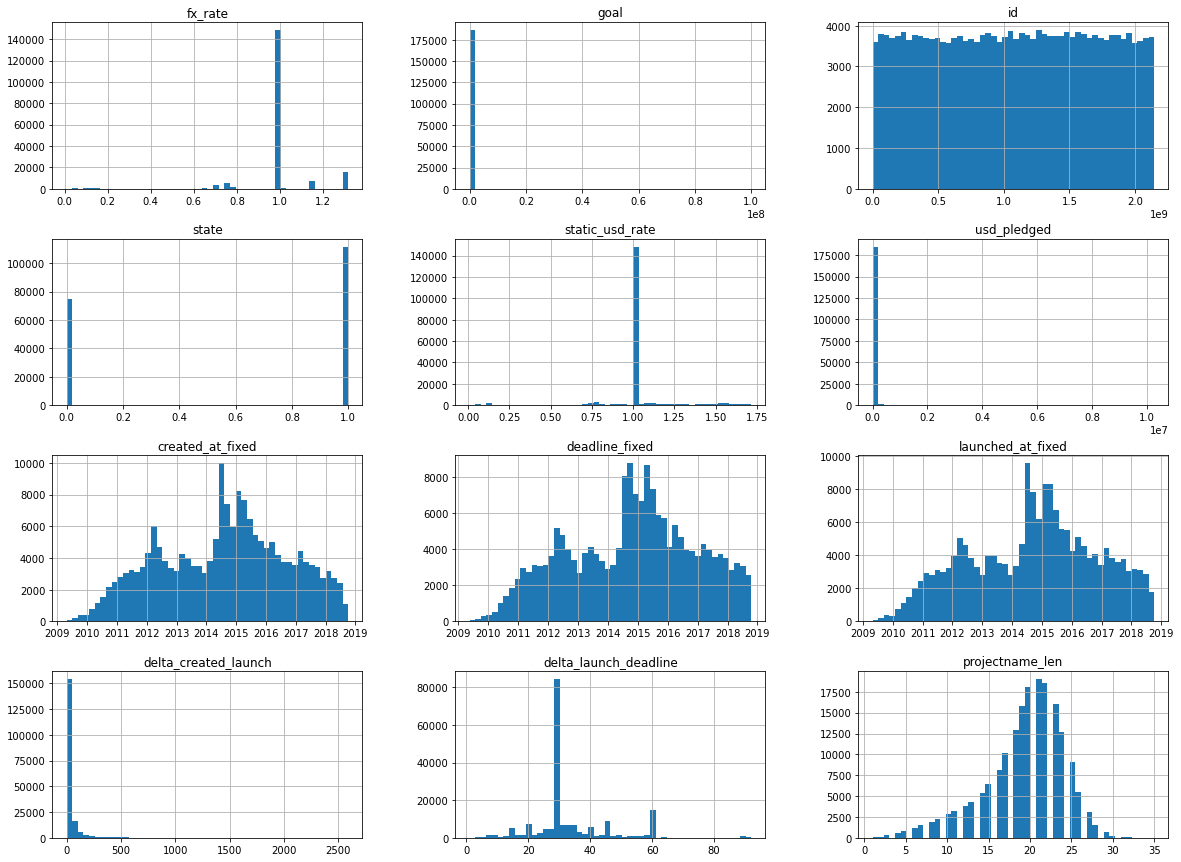

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))

plt.show()

1    111615
0     74722
Name: state, dtype: int64


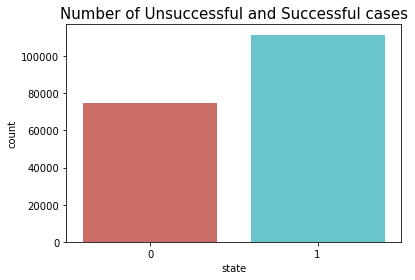

In [185]:
state = df['state'].value_counts()
print(state)

sns.countplot(x='state', data=df, palette='hls')
plt.title("Number of Unsuccessful and Successful cases", fontsize=15)
plt.show()

> We have more successful cases. A difference of around 37.000 is felt between successful and non successful.

# **<center><span style="color:limegreen">Preprocessing Data</span><center>**

Before beginning with the modelling phase, we need to drop more variables. Specifically, the variable "name", "ID ", and "usd_pledged"

In [186]:
df = df.drop("usd_pledged", axis = 1)
df = df.drop(['id', 'name'], axis = 1)

In [187]:
df.columns

Index(['country', 'currency', 'fx_rate', 'goal', 'state', 'static_usd_rate',
       'usd_type', 'created_at_fixed', 'deadline_fixed', 'launched_at_fixed',
       'delta_created_launch', 'delta_launch_deadline', 'projectname_len',
       'sub_category', 'city', 'Category'],
      dtype='object')

In [188]:
df['launched_month'] = pd.DatetimeIndex(df['launched_at_fixed']).month

df['deadline_month'] = pd.DatetimeIndex(df['deadline_fixed']).month

df['created_month'] = pd.DatetimeIndex(df['created_at_fixed']).month

In [189]:
df = df.drop(['deadline_fixed', 'created_at_fixed', 'launched_at_fixed' ], axis = 1)

In [190]:
#Since we don't have a very unbalanced dataset in terms of labels, we will use train_test_split
df["state"].value_counts()

1    111615
0     74722
Name: state, dtype: int64

In [191]:
df.columns

Index(['country', 'currency', 'fx_rate', 'goal', 'state', 'static_usd_rate',
       'usd_type', 'delta_created_launch', 'delta_launch_deadline',
       'projectname_len', 'sub_category', 'city', 'Category', 'launched_month',
       'deadline_month', 'created_month'],
      dtype='object')

# **<span style="color:forestgreen">Pipeline</span>**

In [192]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [193]:
x_train = train_set.drop("state", axis=1) # drop label for training set
y_train = train_set["state"].copy()

x_test = test_set.drop("state", axis=1) # drop label for training set
y_test = test_set["state"].copy()

In [194]:
df.dtypes

country                   object
currency                  object
fx_rate                  float64
goal                     float64
state                      int64
static_usd_rate          float64
usd_type                  object
delta_created_launch       int16
delta_launch_deadline       int8
projectname_len          float64
sub_category              object
city                      object
Category                  object
launched_month             int64
deadline_month             int64
created_month              int64
dtype: object

In [195]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [196]:
df["city"].nunique()

12107

In [197]:
numeric_features = ['fx_rate', 'goal', 'projectname_len', 'static_usd_rate', "delta_created_launch", "delta_launch_deadline"]
cat_features = ['country','sub_category', 'usd_type', 'currency', "Category","launched_month","deadline_month","created_month"]

# Pipeline of numerical variables
num_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('scaler', StandardScaler())
])

# Pipeline of categorical variables
cat_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(cat_features)),
    ('hot', OneHotEncoder(handle_unknown="ignore", sparse=False))])

In [198]:
# Preprocessor for both categorical and numerical
preprocessor = ColumnTransformer(transformers=[('numeric', num_pipeline, numeric_features),
                                               ('categorical', cat_pipeline, cat_features)])

In [199]:
#preprocess train data to predict
prepared_data = preprocessor.fit_transform(x_train)

In [200]:
#preprocess test data to predict 
prepared_data_test = preprocessor.fit_transform(x_test)

# **<center><span style="color:limegreen">Modelling</span><center>**

# **<center><span style="background:palegreen">Logistic Regression</span><center>**

Since we are dealing with a binary classification model , to predict whether a project is going to be successful or not, we beleive that logistic regression is a suitable model to implemnt since we are dealing with more than one independent variable and our intention is to find the best fitting model to describe the relationship between the dependent and the independent variables. In addition, we tried the logistic regression with grid-search in order to find the optimal hyperparameters we should use in the logistic regression in order to get the most "accurate" predictions. 

Some advantages are:
* Easy to implement, interpret and very efficient to train. 
* Not necessary to scale feature or tuning hyperparameters.

But it also has disadvantages such as:
* Poor performance with irrelevant and highly correlated features. Therefore, all the important variables should be identified previously in order for it to work well.
* Not very powerful and can be easily outperformed by other algorithms.
* Sensitive to outliers

**Expectations** <br> We expect the logistic regression to be faster in terms of performance than other classification models such as XGBoost and SVC, especially when we specify before hand the hyperparameters that we want to use (provided by the grid search method). In terms of scoring, we are not expecting it to be the model with best scores, and therefore we believe these will increase as we try more complex models. In average we can expect scores rounding 0.7 for the chosen metrics. 

In [90]:
start_time = time.time()

In [91]:
# 5 fold cross validation Logistic Regression
clf = LogisticRegressionCV(penalty = 'l2', cv=5, random_state=42).fit(prepared_data, y_train)

In [92]:
end_time = time.time()
print(f"The fit time for LR is: {end_time-start_time}")

The fit time for LR is: 160.61768174171448


In [93]:
y_pred = clf.predict(prepared_data)

In [94]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

array([[44039, 15684],
       [18944, 70402]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

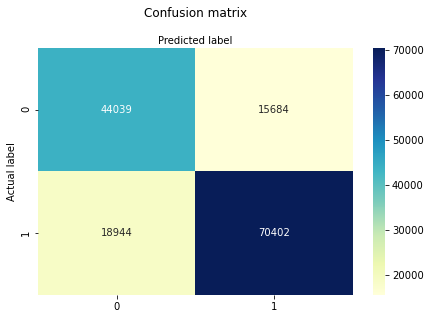

In [95]:
# Visualization of the confusion matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Precision: 0.8178100968798643
Recall: 0.7879703624112999
Accuracy: 0.7677048883402988


In [97]:
# Evaluate on test data
y_pred_test = clf.predict(prepared_data_test)

print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Precision: 0.8148561854230661
Recall: 0.7862050383941802
Accuracy: 0.7655092841043254


#### Comment on time: 
* Even though we don't have a large dataset, we noticed that the logistic regression model is time consuming and computationally heavy, which is not something we encounter frequently with this model. We believe that further other models will be more time consuming, which is something that will be taken into account when choosing the right model.

#### Comment on model performance:
* Even though the fit time was higher, the scores turned out good. 
* Both train and test scores are really similar and overall high. From this we can also, conclude that the model didn't overfit.

## **<center><span style="color:forestgreen">Fine-tuning Logistic Regression</span><center>**

In [211]:
start_time = time.time()

strength = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty" : ["l1", "l2"]}

model = LogisticRegression(solver="liblinear", random_state=42)

gr_search = GridSearchCV(estimator=model, param_grid=strength, 
                          cv=5, scoring='precision')

gr_search.fit(prepared_data, y_train)

end_time = time.time()
print(f"The fit time for LR grid serach is: {end_time-start_time}")

best_parameter = gr_search.best_params_
print(best_parameter)

#predicting on the train data

y_pred_gr_search = gr_search.best_estimator_.predict(prepared_data)

cnf_mat = confusion_matrix(y_train, y_pred_gr_search)
print(cnf_mat)

print("Precision:",metrics.precision_score(y_train, y_pred_gr_search))
print("Recall:",metrics.recall_score(y_train, y_pred_gr_search))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gr_search))

The fit time for LR grid serach is: 394.30869698524475
{'C': 1000, 'penalty': 'l2'}
[[43559 16164]
 [19192 70154]]
Precision: 0.812738942051484
Recall: 0.7851946365813802
Accuracy: 0.7628212438535175


In [212]:
#predicting on the test data

y_pred_gr_search_test = gr_search.best_estimator_.predict(prepared_data_test)

cnf_mat = confusion_matrix(y_test, y_pred_gr_search_test)
print(cnf_mat)

print("Precision:",metrics.precision_score(y_test, y_pred_gr_search_test))
print("Recall:",metrics.recall_score(y_test, y_pred_gr_search_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gr_search_test))

[[10956  4043]
 [ 4839 17430]]
Precision: 0.8117170400037256
Recall: 0.7827024114239526
Accuracy: 0.7616722120854352


#### Feature importance for our business problem: 

One of the advantages of implementing regularization (especially if using L1 regularization) on the logistic regression is that we can actually determine what features the regularized model did not consider important for prediction. This might start giving us some hints regarding what projects are likely to be more succesful than others, or what characteristics of the project should be considered for future project creators and investors.

In [213]:
# first we need to extract column names of the prepared data, but column Transformer does not have the get_feature_names_out
# method anymore, so we will do a "trick" to get the features names with sklearn pandas

alt_pipeline = DataFrameMapper([
    ((numeric_features), sklearn.preprocessing.StandardScaler()),
    ((cat_features), sklearn.preprocessing.OneHotEncoder())
    ]) 

alt_pipeline.fit_transform(x_train)
alt_pipeline.transformed_names_

['fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_0',
 'fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1',
 'fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_2',
 'fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_3',
 'fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4',
 'fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_5',
 'country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x0_AT',
 'country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x0_AU',
 'country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x0_BE',
 'country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x0_CA',
 'country_sub_category_usd_t

In [217]:
# Get coefficients

coef_best_parameter_df = pd.DataFrame(gr_search.best_estimator_.coef_)
coef_best_parameter_df.columns = alt_pipeline.transformed_names_
print("Top 10 features that contribute to prediction the most: ")
coef_best_parameter_df.T.sort_values (by = 0, ascending = False)[:11] 

Top 10 features that contribute to prediction the most: 


,0
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Video Games,17.490673
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Documentary,9.963301
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Shorts,9.913527
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Food,9.896508
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Crafts,9.851943
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Photography,9.849384
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Technology,9.815865
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Indie Rock,9.719767
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Rock,9.666989
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Fashion,9.649227


- While the best regularization method selected by the grid search was L2 penalty,those coefficients that were shrinked the most were probably the least important ones. Thus, usually, a higher coefficient means that the variable has a higher predictive power 
- As we can see, the x1 feature (in this case, sub_category) seems to be the most relevant one - which makes sense. 
- Morevoer, whether the project is a video game or not seems to have the most important from the rest of the categories. We will see if that is the case for other models that allow to retrieve feature importance, but this would be an important insight from the business perspective

> **Grid search is also computationally heavy and time consuming**
#### Comment on time:
* In this situation, using Grid Search to find optimal hyperparameters takes more times because it tries different combinations of the model's hyperparameters. 

#### Comment on model performance
* When we look at the train test we see that the performance in our precision, accuracy and recall are very similar compared to when we do not tune the hyperparemeters. The scores themselves are good.
* The precision is high, meaning that we have a good prediction on the correct positives.
* Finally, in this situation, we realized that we found different hyperparameters than in the default configuration, however, the scores remained the same.

# **<center><span style="background:palegreen">Decision Tree</span><center>**

We have additionally decided to try out the decision tree because it allows to consider all possible outcomes of the decision path.

Some of the advantages of Decision Tree:
* It is considered a “white box” model, meaning, it’s results are easily interpretable and visualizable. 
* Building the model does not require extensive data preparation and it can handle numerous missing values.
* Provides a clear indication of the features that are most important for our prediction

Some of the disadvantages of Decision Tree:
* The modelling is prone to overfit and create biased trees if we have an unbalanced data
* Small variations in the data affect the models results heavily

**Expectations:** <br>
We expect the model to have one of the lowest fitting times out of all of the models we use. We expect the results to be pretty good but as decision trees have a tendency to overfit, the results should be worse (when comparing training and tests sets) than the Random Forest Classifier that makes predictions by averaging them.


In [218]:
start_time = time.time()

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(prepared_data, y_train)

end_time = time.time()
print(f"The fit time for Decision Tree is: {end_time-start_time}")

#predicting on the train data
y_pred_dt = tree_clf.predict(prepared_data)

cn = confusion_matrix(y_train, y_pred_dt)
print(cn)

print("Precision:",metrics.precision_score(y_train, y_pred_dt))
print("Recall:",metrics.recall_score(y_train, y_pred_dt))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_dt))

The fit time for Decision Tree is: 19.530472993850708
[[59718     5]
 [   10 89336]]
Precision: 0.9999440346537424
Recall: 0.9998880755713742
Accuracy: 0.9998993754570031


> **Getting very high scores, due to predicting on the already known data for the model, expecting to get good results when predicting on the test set.**

In [219]:
#predicting on the test data
prepared_data_test = preprocessor.fit_transform(x_test)

y_pred_dt_test = tree_clf.predict(prepared_data_test)

cn = confusion_matrix(y_test, y_pred_dt_test)
print(cn)

print("Precision:",metrics.precision_score(y_test, y_pred_dt_test))
print("Recall:",metrics.recall_score(y_test, y_pred_dt_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_test))

[[ 8865  6134]
 [ 4337 17932]]
Precision: 0.7451175932851326
Recall: 0.8052449593605461
Accuracy: 0.7190350971342707


In [220]:
# check tree depth 
tree_clf.get_depth()

121

- As we mentioned, probably the biggest advantage of the decision tree is that it helps making business recommendations given its interpretabilty. However, with a depth of 121, it would be hard to analyze any conclusions. Yet, we can still take advantage of the model and retrieve the feature importances:

In [241]:
# get importances
feature_importance_dt_df = pd.DataFrame(tree_clf.feature_importances_).T
feature_importance_dt_df.columns = alt_pipeline.transformed_names_
print("Top 10 most important features according to Decision Tree: ")
feature_importance_dt_df.T.sort_values (by = 0, ascending = False)[:11] 

Top 10 most important features according to Decision Tree: 


,0
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1,0.148219
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4,0.104636
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_2,0.073285
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_5,0.056676
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_3,0.023172
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Documentary,0.014432
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Product Design,0.013982
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Video Games,0.013599
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Shorts,0.012082
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Tabletop Games,0.009784


- From the table above, we can see that the most important features for the decision tree are actually the goal amount, followed by the difference between when the project was created and when it was launched, and the lenght of the project name. Since we have not tuned this tree, it is hard to extract at these points what values should those be for more succesful projects, but it is something to further inspect after tuning the tree. 
- We can see that, as already shown with the logistic regression, the other relevant features are related to the project subcategory, such as whether they are Video Games or Documentary

#### Comment on time:
* The time of the decision tree model is so far the fastest. The fitting time is almost 15 times less than the previous models. This approach, considering the time is the best, although we need to account also the scores to identify if this is the best approach.

#### Comment on model performance: 
* It seems that the model is performing much better when predicting on the train data than the test ones, allowing us to say that we face some over fitting issues. This can be due to the better understanmding of the train data.
* While the model was trained fast, and we obtained almost 100 % precision rate, the precision on the test data was not as high (decreasing down to 75 %). It's not a terrible model, but it could be better. Of course, other tree-based models such as Random Forests, or any Boosting algorithm, is expected to perform better. Yet, we believe decision tree by itself could perform better.
* As a result, because the train and test errors are 0.15 points apart, we believe the model is overfitting since it is not generalizing well on the test data, or at least as well as expected. Some reasons might be that our training data is a little bit noisy, or the depth of the tree is too high.
* Thus, we will perform grid search to find some hyperparameters that force the decision tree to be a little more generalizable. This probably would sacrifice precision in the train score, but we could expect a bit higher precision on the test set (since the rules of the decision tree would be a little more general)
* After checking the depth of our model, we realized that it has a depth of 81, considered high especially if we want to extract any business insights from the model (one of the advantages of decision trees)

## **<center><span style="color:forestgreen">Fine-tuning Decision Tree</span><center>**

In [246]:
param_dict = {"criterion": ["gini", "entropy"] , 
              "max_depth": [3, 5], 
             "min_samples_split": range(1,10),
             "min_samples_leaf": range(1,5)}

In [247]:
start_time = time.time()

In [248]:
gr_search_dt = GridSearchCV(estimator=tree_clf, param_grid=param_dict, 
                          cv=5, scoring='precision')

In [249]:
gr_search_dt.fit(prepared_data, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='precision')

In [250]:
end_time = time.time()
print(f"The fit time for Decision Tree grid serach is: {end_time-start_time}")

The fit time for Decision Tree grid serach is: 2022.155688047409


In [251]:
best_parameter = gr_search_dt.best_params_
print(best_parameter)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [252]:
#predicting on the train data
y_pred_dt_gr_search = gr_search_dt.best_estimator_.predict(prepared_data)

cn = confusion_matrix(y_train, y_pred_dt_gr_search)
print(cn)

print("Precision:",metrics.precision_score(y_train, y_pred_dt_gr_search))
print("Recall:",metrics.recall_score(y_train, y_pred_dt_gr_search))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_dt))

[[27116 32607]
 [16063 73283]]
Precision: 0.692067239588252
Recall: 0.8202157902983905
Accuracy: 0.9998993754570031


In [253]:
#predicting on the test data

y_pred_dt_gr_search = gr_search_dt.best_estimator_.predict(prepared_data_test)

cn = confusion_matrix(y_test, y_pred_dt_gr_search)
print(cn)

print("Precision:",metrics.precision_score(y_test, y_pred_dt_gr_search))
print("Recall:",metrics.recall_score(y_test, y_pred_dt_gr_search))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_gr_search))

[[ 6028  8971]
 [ 3561 18708]]
Precision: 0.6758914700675602
Recall: 0.8400916071669137
Accuracy: 0.6637329612536224


- Let's now plot the tree since we constrained the depth and the results will be more readable

[Text(0.5, 0.875, 'X[1] <= -0.021\ngini = 0.48\nsamples = 149069\nvalue = [59723, 89346]'),
 Text(0.25, 0.625, 'X[4] <= -0.327\ngini = 0.454\nsamples = 120851\nvalue = [42015, 78836]'),
 Text(0.125, 0.375, 'X[1] <= -0.034\ngini = 0.491\nsamples = 47692\nvalue = [20712, 26980]'),
 Text(0.0625, 0.125, 'gini = 0.464\nsamples = 32965\nvalue = [12080, 20885]'),
 Text(0.1875, 0.125, 'gini = 0.485\nsamples = 14727\nvalue = [8632, 6095]'),
 Text(0.375, 0.375, 'X[179] <= 0.5\ngini = 0.413\nsamples = 73159\nvalue = [21303, 51856]'),
 Text(0.3125, 0.125, 'gini = 0.407\nsamples = 72096\nvalue = [20527, 51569]'),
 Text(0.4375, 0.125, 'gini = 0.394\nsamples = 1063\nvalue = [776, 287]'),
 Text(0.75, 0.625, 'X[4] <= -0.308\ngini = 0.467\nsamples = 28218\nvalue = [17708, 10510]'),
 Text(0.625, 0.375, 'X[67] <= 0.5\ngini = 0.296\nsamples = 9215\nvalue = [7549, 1666]'),
 Text(0.5625, 0.125, 'gini = 0.281\nsamples = 9087\nvalue = [7549, 1538]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 128\nvalue = [0,

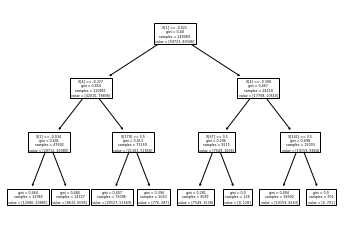

In [254]:
sklearn.tree.plot_tree(gr_search_dt.best_estimator_)

In [277]:
# Retrieve importances
feature_importance_dt_best_df = pd.DataFrame(gr_search_dt.best_estimator_.feature_importances_).T
feature_importance_dt_best_df.columns = alt_pipeline.transformed_names_
print("Top 5 most important features according to Decision Tree (optimized): ")
feature_importance_dt_best_df.T.sort_values (by = 0, ascending = False)[:5] 

Top 5 most important features according to Decision Tree (optimized): 


,0
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1,0.588476
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4,0.281926
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Product Design,0.053613
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Web,0.053534
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Documentary,0.022451


In [271]:
# Extract decision tree rules used
text_representation = tree.export_text(gr_search_dt.best_estimator_, feature_names=alt_pipeline.transformed_names_)
print(text_representation)

|--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1 <= -0.02
|   |--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4 <= -0.33
|   |   |--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1 <= -0.03
|   |   |   |--- class: 1
|   |   |--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1 >  -0.03
|   |   |   |--- class: 0
|   |--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4 >  -0.33
|   |   |--- country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Web <= 0.50
|   |   |   |--- class: 1
|   |   |--- country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Web >  0.50
|   |   |   |--- class: 0
|--- fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1 >  -0.02
|   |---

- We can now see the advantage of using a decision tree for business problems. As we displayed here, and similar to previous results, the important features are some of the subcategories, the goal, and the difference between created and launched
- More specifically, although our data is scaled, we can see that if the goal is smaller than average, and the difference between created and launched is also smaller than average, then it is probably a succesful project [1st set of rules]
- We can also see that those projects that took longer between created and launched, and their subcategory is Web, they probably would fail
- In the second set of rules, we see that goal is splitted, and that those with goal higher than average, and a small difference between created and launched, and are Documentary projects, are probably succesful projects (this is very interesting - might be useful to investigate if usually Documentary projects have higher goals overall)
- Then, we can see that if the time between created and launched is a bit longer (but still under average), and the project is regarding Product Design, then it would probably succeed.
- These are the rules imposed by this decision tree, but it is important to highlight that it did not perform well (precision was under 70%). Thus, these rules need to be interpreted with caution, and a combination of important parameters in this and other models should be consdiered, along with business knowledge, for final recommendations for investors and creators

#### Comments on time:
* After a long time, we can conclude that the fitting time is generally high. Although if we look at the amount of parameters that we fed the grid search we will be consideing about 500 combinations. this of course takes time and can justify the high fitting time of this model.

#### Comments on model performance
* Given the train scores, we obtain good values, although we can sense a little overfitting due to the excelent accuracy obtained. 
* When we take a closer look to the test scores, a more dramatic decrease is felt when compared to the previous models. Even though, our decision metric (precision) is still quite high.
* When comparing and evaluating both, the only score that had a major difference was accuracy. It was overfitting in the train setand performs poorly on the test set.

#### Comments on possible overfitting
* Unfortunately, our model didn't see an increase in the precision rate. However, with this model we are sure that there is no overfitting issues, since our precision scores in both train and test sets are very similar. 
* We will consider improved versions of tree-based models (boosting, bagging) to find better algortithms for the problem at hand.

# **<center><span style="background:palegreen">XGBoost</span><center>**

XGBoost is a tree based ensemble machine learning algorithm which has higher predicting power and performance and it is achieved by improvisation on Gradient Boosting framework by introducing some accurate approximation algorithms. It is a good approach for ML problems, since it also adds regularisation to the loss function to penalize the complexity. This approach is beneficial because it performs well in cases were the data has a mixture of numerical and categorical features, as well as when the model performances metrics are to be considered. Overall is a good learning model.

All in all, this model as several advantages such as:
* Less need for feature engineering - scaling, normalising data, handle missing values …
* Feature importance can be found out
* Fast to interpret
* Outliers have minimal impact.
* Good model performance 
* Less prone to overfitting

But just like any other model it has its disadvantages:
* Difficult interpretation
* Harder to tune
* Overfit if parameters are not tuned properly.

**Expectations:** <br>
By using such model we are counting on having one of the best, if not the best, scores of precision. Given this model good learning rate and success among competitions, it is our prediction to have it performing better than the rest. 
Given the XGBoost properties and fast characteristics we expect it to minimize the fitting time given the number of hyper parameters that we will feed the model with. 

In [53]:
start_time = time.time()

#defining the hyper parameters
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8,
'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params),
cv_params,
scoring = 'precision', cv = 5, n_jobs = -1)

In [54]:
optimized_GBM.fit(prepared_data, y_train)
end_time = time.time()
print(f"The fit time for XGBoost is: {end_time-start_time}")

[17:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The fit time for XGBoost is: 6972.977412700653


In [55]:
print(optimized_GBM.best_params_)
print(optimized_GBM.best_score_)

{'max_depth': 7, 'min_child_weight': 1}
0.8474465042969532


In [56]:
# predict and evaluate on train set
y_train_pred = optimized_GBM.predict(prepared_data)

In [57]:
# Confusion Matrix 
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix

array([[51230,  8493],
       [ 9619, 79727]], dtype=int64)

In [58]:
print("Precision:",metrics.precision_score(y_train, y_train_pred))
print("Recall:",metrics.recall_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Precision: 0.9037293130809341
Recall: 0.8923398921048508
Accuracy: 0.8784992184827161


In [60]:
# predict and evaluate on test set
y_test_pred =optimized_GBM.predict(prepared_data_test)

In [61]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[ 9249,  5750],
       [ 2558, 19711]], dtype=int64)

In [62]:
print("Precision:",metrics.precision_score(y_test, y_test_pred))
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Precision: 0.7741644083107497
Recall: 0.8851317975661233
Accuracy: 0.7770741655039176


#### Comment on time
* As we expect the more hyperparameters we use, the highest the fit time will be. 
* We have so far the highest time, but it does not mean that the model is not good due to the previous point.

#### Comment on model performance
* In fact, XGBoost has really high scores for both train and test. 
* Given that our metric of choice is precision, if we focus just on it we see that the train scores is really good, as it should be given the good general model performance on learning the data.
* As for the test, it is also good but slightly less than the train.

# **<center><span style="background:palegreen">Random Forest Classifier</span><center>**

We are using random forest as one of the model alternatives, since it is an estimator that fits a number of decision tree classifiers on different sub-samples of the data, using averaging to improve the predictive metrics (in our case, precision) and control over-fitting cases. Thus, our hypothesis is that Random Forest will have a better performance than decision tree. Another reason is that with this model, we can control the size of each sub-sample with certain parameters, otherwise the whole dataset size is used for building each tree, which is rather a time-consuming procedure. 

Also, there are more advantages in favor of this model:
* Random forest can decorrelate tree with specific sub-samples and highly correlated features
* Minimized individual errors and reduces variance
* Controlling error of unbalanced dataset: in our case we don’t have that much of unbalance, but still the successful projects are much more than the unsuccessful ones
* Little impact on outliers: any mislabeled data that we didn’t notice in the exploratory analysis will not impact greatly this model 
* Deals with overfitting and more regularization taking every time a different sample of instances 
* Helps in understanding the importance of each feature in the dataset

However, there are some disadvantages:
* Features need to be statistically important and have predictive power
* Predictions between trees should correlate
* Process that is hidden and the instructor can only check on its performance and outcomes

**Expectations:** <br> Since we believe we have created good features and believe that trees will not tend to over correlate, we are expecting higher results in the random forest than the decision tree.


In [230]:
start_time = time.time()
clf=RandomForestClassifier(n_estimators=10)
clf.fit(prepared_data, y_train)
end_time = time.time()
print(f"The fit time for Random Forest is: {end_time-start_time}")
#not inserting max_depth, not to constrain the algorithm

The fit time for Random Forest is: 17.367259979248047


In [231]:
#predicting on train
y_fores_pred = clf.predict(prepared_data)
cn = confusion_matrix(y_train, y_fores_pred)
print(cn)
predicted_proba = clf.predict_proba(prepared_data)
print(predicted_proba)

print("Precision:",metrics.precision_score(y_train, y_fores_pred))
print("Recall:",metrics.recall_score(y_train, y_fores_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_fores_pred))

[[59386   337]
 [ 1184 88162]]
[[0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 ...
 [0.3 0.7]
 [0.  1. ]
 [1.  0. ]]
Precision: 0.9961920473677669
Recall: 0.9867481476507063
Accuracy: 0.9897966713401176


In [232]:
#predicting on test
y_fores_pred_test = clf.predict(prepared_data_test)
cn = confusion_matrix(y_test, y_fores_pred_test)
print(cn)
predicted_proba = clf.predict_proba(prepared_data_test)
print(predicted_proba)

print("Precision:",metrics.precision_score(y_test, y_fores_pred_test))
print("Recall:",metrics.recall_score(y_test, y_fores_pred_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_fores_pred_test))

[[10785  4214]
 [ 4446 17823]]
[[0.5 0.5]
 [0.5 0.5]
 [0.3 0.7]
 ...
 [0.  1. ]
 [0.2 0.8]
 [0.3 0.7]]
Precision: 0.8087761492036121
Recall: 0.8003502626970228
Accuracy: 0.7676290651497263


- As we did with decision tree, we can retreieve feature importance from Random forest. Because we have better scores for this model than in decision tree, we are a little more confident about the relevance of these features to predict succesful projects

In [272]:
# get importances
feature_importance_rf = pd.DataFrame(clf.feature_importances_).T
feature_importance_rf.columns = alt_pipeline.transformed_names_
print("Top 10 most important features according to Random Forest: ")
feature_importance_rf.T.sort_values (by = 0, ascending = False)[:11] 

Top 10 most important features according to Random Forest: 


,0
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1,0.135234
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4,0.103488
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_2,0.083379
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_5,0.067514
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_3,0.016784
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x4_food,0.014309
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Food,0.012012
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Web,0.011324
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Documentary,0.010508
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Product Design,0.009769


- Similarly to previous models, some important features include subcategory, goal, the difference between created and launched, and the project name length.
- In this case, not only Product Design and Documentary were chosen, but Food category seems to have some importance in the model

#### Comment on time:
* From all the models, Random Forest is the one that took less time to fit the variables. This is explained by the selection of specific sub-samples for each tree, rather than the whole dataset. Conclusion: random forest is less time-consuming, even if it consists of various decision trees.

#### Comment on model performance
* Once again, we are presented with a model that preforms really good on the train test and worse on the test. However, the test scores are better compared to the decision tree ones, as expected, thus our hypothesis is confirmed. 
* Generally having very high train and test scores, concluding we are not facing any underfitting issues here.
* Receiving very high test scores, with small differences between test and train, gives us the right to conclude that we are not facing overfitting issues. As it is normal, for the model to perform a bit worse on unknown data, than on already known ones.
* Random forest classifier is a model with overall very good fit time and good scorings, eliminating any overfitting or underfitting possibilities.


## **<center><span style="color:forestgreen">Finetuning Random Forest Classifier</span><center>**

In [262]:
param_dict = {"criterion": ["gini", "entropy"], 
             "min_samples_split": range(1,10),
             "min_samples_leaf": range(1,5)}

In [57]:
start_time = time.time()

In [263]:
gr_search_rf = GridSearchCV(estimator=clf, param_grid=param_dict, 
                          cv=5, scoring='precision')

In [264]:
gr_search_rf.fit(prepared_data, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='precision')

In [265]:
end_time = time.time()
print(f"The fit time for Random Forest grid search is: {end_time-start_time}")

The fit time for Random Forest grid search is: 6897.186331748962


In [266]:
best_parameter = gr_search_rf.best_params_
print(best_parameter)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [267]:
#predicting on the train data
y_pred_rf_gr_search = gr_search_rf.predict(prepared_data)

cn = confusion_matrix(y_train, y_pred_rf_gr_search)
print(cn)

print("Precision:",metrics.precision_score(y_train, y_pred_rf_gr_search))
print("Recall:",metrics.recall_score(y_train, y_pred_rf_gr_search))
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_rf_gr_search))

[[59413   310]
 [ 1118 88228]]
Precision: 0.996498678533511
Recall: 0.9874868488796364
Accuracy: 0.9904205435066983


In [268]:
#predicting on the test data

y_pred_rf_gr_search = gr_search_rf.predict(prepared_data_test)

cn = confusion_matrix(y_test, y_pred_rf_gr_search)
print(cn)

print("Precision:",metrics.precision_score(y_test, y_pred_rf_gr_search))
print("Recall:",metrics.recall_score(y_test, y_pred_rf_gr_search))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_gr_search))

[[10773  4226]
 [ 4364 17905]]
Precision: 0.8090461343816366
Recall: 0.8040325115631596
Accuracy: 0.7695073521519803


In [274]:
# get importances
feature_importance_best_rf = pd.DataFrame(gr_search_rf.best_estimator_.feature_importances_).T
feature_importance_best_rf.columns = alt_pipeline.transformed_names_
print("Top 10 most important features according to Random Forest (optimized): ")
feature_importance_best_rf.T.sort_values (by = 0, ascending = False)[:11] 

Top 10 most important features according to Random Forest (optimized): 


,0
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_1,0.129402
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_4,0.095787
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_2,0.083051
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_5,0.067619
fx_rate_goal_projectname_len_static_usd_rate_delta_created_launch_delta_launch_deadline_3,0.018471
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Product Design,0.013117
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Shorts,0.012355
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Documentary,0.012310
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Video Games,0.011561
country_sub_category_usd_type_currency_Category_launched_month_deadline_month_created_month_x1_Indie Rock,0.010734


- After tuning our random forest, we can see that Product Design and Documentary remained important, and Video Games is now considered relevant. Morevoer, the goal, difference between created and launched, and project name lenght also stayed as the top relevant features.

#### Comment on time:
* It was expectable that the by using the grid search it would take longer, however, the amount of hyperparameters that we feed the model with justify the 45 minutes of fit time. 
* All in all, even if it is a little time consuming, when compared to the previous ones and possible future models, it is good. 

#### Comment on model performance:
* We believe that these are one of the best scores obatined.
* When we look at the previous grid-searches applied in other models, the train and test scores were not as high as with the Random Forest
* We can conclude that with our best parameters, we obtained one of the best models, and even though it takes a little more time, the trade-off time-scores is justifiable

# **<center><span style="background:palegreen">Support Vector Classifier</span><center>**

Support vector machine might be a helpful classifier in some cases, so we will test how it performs on our data. 

Some of the advantages of the SVM algorithm:
* Handles non-linear data efficiently with the kernel trick.
* We can change the regularization parameter to prevent overfitting our data
* Support vectors remain usually the same with small changes of the data, so the model is stable, meaning we won’t expect to see highly different results if change does not change that much.

Some disadvantages:
* For our problem at hand, SVM might not be suitable. Because we have a large dataset, this algorithm takes a long time to train given the way it operates (by using the kernel trick, the algorithm transforms the data in a way that makes it separable and then finds the support vectors – data points that reduce the margin of our classifying “line” between our 2 classes.
* While there are many parameters to tune, doing so it is computationally and time costly. 
* Unfortunately, given the way that it classifies the data, is very hard to interpret the results – not easy to determine what variables are having what impact, especially if we have many features. This is not recommended for business problems, unlike tree-based models, where we can visualize the parameters and values that are used for classification.


**Expectations:** <br> While we expect relatively good predictions, the training time of this model would make it one of the worst options.<br> If we were able to fine tune the model, we might get better results. However, the time alone in training would be already costly, thus finding best hyperparameters might not be feasible.


In [88]:
start_time = time.time()
clf_svc = SVC(random_state = 42) # all other params default
clf_svc.fit(prepared_data, y_train)
end_time = time.time()
print(f"The fit time for SVC is: {end_time-start_time}")

The fit time for SVC is: 31359.05060005188


In [89]:
#predicting on the train
predicted_y = clf_svc.predict(prepared_data)

In [100]:
#calculating our metric of choice
tn, fp, fn, tp = confusion_matrix(y_train, predicted_y).ravel()
precision_score = tp / (tp + fp)

In [101]:
print(f"The precision score for the train data is {precision_score}")

The precision score for the train data is 0.861765550926591


In [97]:
#predicting on the test
predicted_y_test = clf_svc.predict(prepared_data_test)

In [98]:
#calculating our metric of choice
tn, fp, fn, tp = confusion_matrix(y_test, predicted_y_test).ravel()
precision_score = tp / (tp + fp)

In [99]:
print(f"The precision score for the test data is {precision_score}")

The precision score for the test data is 0.8426166426166426


#### Comment on time:
* Regarding time, as we expected, the SVC took a long time (around 9 hours). As explained earlier, this is because of how the SVM algorithm finds the patterns. 
* This would be a disadvantage if model needs to be constantly trained and improved for business purposes.

#### Comment on model performance
* In terms of score, our precision in both train and test data was over 80%. This is a good sign because it indicates the model is generalizing well, since our precision score in test data was only 2 % less than in the train data (84 vs 86%)
* Overall, given the time the model took for training, we would have liked to see higher results (at least 90%). We acknowledge that some hyperparameter tuning would be ideal in this situation, since the parameters used were the default ones. 
* Yet, this would be computationally and time expensive to perform.

# **<center><span style="background:palegreen">AdaBoost Classifier</span><center>**

Just like other Boosting algorithms, ADABoost is a set of the low accurate classifier to create a highly accurate classifier. It will be able to track the model who failed the accurate prediction and provide a good fit by minimising training error. A single classifier may not be able to reliably forecast an object's class, but we may develop a powerful model by combining numerous weak classifiers, each learning from the others' incorrectly classified items. The default value of the ADABoost classifier is the DecisionTree Classifier, although it is possible to change the base learner also to SVC. However, we opt to not try ADABoost with SVC as base learner, since we expect to have the largest fit time of the models and we already have performed models with good scores, meaning, that if we consider the ratio of time and scores, it is not worth it to perform such model.

AdaBoost has a lot of advantages: 
* it is easier to use with less need for tweaking parameters unlike algorithms like SVM. 
* less affected by the overfitting problem.
* It could be because of the reason that parameters are not jointly optimised 
* improve the accuracy of your weak classifiers 

However, there are a  few Disadvantages of AdaBoost are :
* important to ensure that you have quality data. 
* extremely sensitive to Noisy data and outliers 

**Expectations:** <br>
Given that we have low noisy data and timeliness of result is not the main concern, we expect to have better results with AdaBoost model. 
We also expect  our model to not overfit on the train data, and as concesquence to have good score results for precision.

In [83]:
start_time = time.time()

# The following code trains an AdaBoost classifier based on 200 Decision Stumps:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)

ada_clf.fit(prepared_data, y_train)

end_time = time.time()
print(f"The fit time for ADABoost with Decision Tree is: {end_time-start_time}")

The fit time for ADABoost with Decision Tree is: 290.76871609687805


In [84]:
#Predict the response for test dataset 
y_pred = ada_clf.predict(prepared_data)

In [85]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
precision_score = tp / (tp + fp)
print("Precision Score:", precision_score)

Precision Score: 0.8285684820845413


In [86]:
#Predict the response for test dataset 
y_pred_test = ada_clf.predict(prepared_data_test)

In [87]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
precision_score = tp / (tp + fp)
print("Precision Score:", precision_score)

Precision Score: 0.7620479544195616


#### Comment on time
* Besides the really fast fit time of Random Forest and Decision Tree, this model performs well.
* It's time is normally a little longer than some other models due to the amount of estimators that we fed the model with
* However, if we take a broad grasp through all the fitting times, we conclude that ADABoost has a really good performance (thus the reason of not performing the ADABoost - SVC as it was already stated)

#### Comment on model performance
* For this model we just present the precision score, since it is our chosen metric of evaluation to better understand other situations such as overfitting.
* Given the train and test scores for precision, we denote that with this model our data doesn't overfit as we were already expecting given the model properties.
* The fact that our data is not noisy and doesn't have much outliers, helped to achieve a better model.

# **<center><span style="background:palegreen">Neural Network</span><center>**

For further explanation, we have decided to try out a Neural Network model, specifically the MLPClassifier, which performs task classification but is simple enough to use it promptly

Some of the advantage of the Neural Network:
* Flexible and able to handle large data, as it splits the data into layers
* After fitting, is quick to predict
* Provides good results

Some of the disadvantages of the Neural Network:
* In essence, Neural Networks are a black box models, namely, the results are difficult to interpret as there is no particular way to understand which features influence the dependent variable the most
* Since it is a non-linear model, it is prone to overfitting

**Expectations:** <br> We expect to obtain a model that does not necessarily have the lowest fitting time, however, has one of the best results


In [49]:
start_time = time.time()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(prepared_data, y_train)
end_time = time.time()
print(f"The fit time for neural networks is: {end_time-start_time}")

The fit time for neural networks is: 56.662028074264526


In [50]:
# Predicting and evaluating on the train set

In [51]:
y_train_pred = clf.predict(prepared_data)

In [52]:
# Confusion Matrix 
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix

array([[44802, 14921],
       [17039, 72307]])

In [53]:
print("Precision:",metrics.precision_score(y_train, y_train_pred))
print("Recall:",metrics.recall_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Precision: 0.8289425413857936
Recall: 0.8092919660645133
Accuracy: 0.7856026403880082


In [54]:
# Predicting and evaluating on the train set

In [55]:
y_test_pred =clf.predict(prepared_data_test)

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[11214,  3785],
       [ 4332, 17937]])

In [57]:
print("Precision:",metrics.precision_score(y_test, y_test_pred))
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Precision: 0.8257526931221802
Recall: 0.8054694867304324
Accuracy: 0.7821992057529248


In [58]:
# Pros: provides quick prediction and quite accurate scores

#### Comment on time:
* As expected, the fitting time is not as long as some other models that took hours to fit, however, not as quick as Decision Tree or Random Forest. 
* Nevertheless, the model is relatively quick to fit, given the good results

#### Comment on model performance
* The model performance is among the best of the models, with precision above 80%. 
* As expected, Neural network models provide better scoring, however, a drawback is that it is difficult to identify afterwards what features have the biggest influence in our dependent variable, that is, whether the project will be successful or not.


# **<center><span style="color:limegreen">Evaluation</span><center>**

### 1) Interpretability
| Model | White Box | Black Box | Explanation |
| ----------- | ----------- | ----------- | ----------- |
| Logistic Regression | X | | <center> Significantly easier to explain and <br> interpret but provide less predictive capacity <center>|
| Decision Tree | X |  |<center>Able to produce "understandable" rules and <br> the decision tree can be visualized<center> |
| XGBoost |  | X |<center>Hard to explain in simple terms how <br> the predictions were made<center> |
| Random Forest Classifier |  | X |<center>It is infeasible to gain a full understanding of <br> the decision process by examining <br> each individual tree.<center> |
| SVC |  | X | <center>Difficult to understand its <br> internal workings<center>|
| ADABoost |  | X |<center>Due to is internal structure and system <br> difficult to analyse mathematically<center> |
| Neural Networks | | X | <center>They generate their own questions and rules <br> and lack of transparency regarding how they do it.<center>|

### 2) Scalability 
Overall, most of the chosen models are good when used to build/predict on a lot of data. It is important to highlight that when using a Decision Tree model you must be aware of the instability of the model, given that any change on the train set can lead to a complete change of the model performance. As for the SVC, it is not proper when using a lot of data because the training complexity of Sit is highly dependent on the size of data set. However, it is not relevant in our project due to not having a lot of data points.
    

### 3) Speed
| Fit time < 300s | Fit time > 300s|
| ----------- | ----------- |
| Logisic Regression | Decision Tree |
| ADABoost|XGBoost |
| Neural Networks | SVC |
|  | Random Forest Classifier |

### 4) Accuracy
Our goal is to find out wether our project is succefull and 80% confidence rate is sufficient and trustworthy enough to invest in the project. Although there is no officialy benchmark for the appropriate margin of safety according to INN money 80% probability of success is enough. Anything that falls below 80% is a risky investment. <br> *source: https://money.cnn.com/2014/10/21/retirement/monte-carlo-success-rate/*

| Train scores > 0.8 | Train scores < 0.8 | Test scores > 0.8 | Test scores < 0.8 |
| ----------- | ----------- | ----------- | ----------- |
|  Logistic Regression  | Decision Tree   | Logistic Regression   | ADABoost |
|  Random Forest Classifier |   |  Random Forest Classifier | Decision Tree  |
|  ADABoost |   |  Neural Networks | XGBoost |
|  Neural Networks |   |  SVC  |  |
| XGBoost |   |   |   |
| SVC |   |   |   |

# **<center><span style="color:limegreen">Conclusion</span><center>**

Given our evalution, and the threshold upon the success of prediction, we believe we are left with 4 model choices: Logistic Regression, Random Forest Classifier, SVC, and neural Network. <br> Moreover, it is extremelly important to have a balance between the good scores and the time that it takes the model to fit, thus we autmatically exclude the SVC from the chosen model due to being a really time consuming one. <br> On the other hand, the interpretability is also an important measure to be taken into account, and the fact that Neural networks models can't extract any business information we can't extract recommendations to potential project creators/investors. <br> This leaves us with two options: Logistic Regression with fine-tuned parameters and Random Forest Classifier also with fine-tuned parameters. Between these two models that provide similar good results we are choosing the Random Forest Classifier with an outlook for the future. Beyond the fact that ensembled methods are always better than doing one model, the Random Forest Classifier ensures that whatever data we might get in the future will be handled. <br> For instance, we might need to feed our model with additional data that includes missing values or outliers. Our model will still be able to mantain accuracy since it can handle missing data and it is not sensitive to outliers.